# Clustering

Importing the right libraries

In [ ]:
!pip install yellowbrick

In [1]:
import sklearn as sk
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import folium
import json
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from kmodes.kmodes import KModes
from yellowbrick.cluster import KElbowVisualizer
from matplotlib import colors # importing colors

* Reading the csv file

In [2]:
la_crimes = pd.read_csv('LA Crime_Cleared.csv')
la_crimes

,DR_NO,Date Rptd,DATE OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,LAT,LON
0,1307355,2010-02-20 00:00:00,2010-02-20 13:50:00,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,...,0,unknown,AA,Adult Arrest,-1,-1,-1,300 E GAGE AV,33.9825,-118.2695
1,11401303,2010-09-13 00:00:00,2010-09-12 00:45:00,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,0,unknown,IC,Invest Cont,-1,-1,-1,SEPULVEDA BL,33.9599,-118.3962
2,70309629,2010-08-09 00:00:00,2010-08-09 15:15:00,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,...,0,unknown,IC,Invest Cont,-1,-1,-1,1300 E 21ST ST,34.0224,-118.2524
3,90631215,2010-01-05 00:00:00,2010-01-05 01:50:00,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,...,102,HAND GUN,IC,Invest Cont,998,-1,-1,CAHUENGA BL,34.1016,-118.3295
4,100100501,2010-01-03 00:00:00,2010-01-02 21:00:00,1,Central,176,1,122,"RAPE, ATTEMPTED",0400,...,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,-1,-1,-1,8TH ST,34.0387,-118.2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114694,190608903,2019-03-28 00:00:00,2019-03-28 04:00:00,6,Hollywood,644,1,648,ARSON,0601 1501,...,506,FIRE,IC,Invest Cont,-1,-1,-1,1400 N LA BREA AV,34.0962,-118.3490
2114695,190715222,2019-08-15 00:00:00,2019-08-14 18:10:00,7,Wilshire,701,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),1300 0344,...,0,unknown,IC,Invest Cont,-1,-1,-1,WILLOUGHBY AV,34.0871,-118.3732
2114696,192004409,2019-01-06 00:00:00,2019-01-06 21:00:00,20,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0432 0421 0340 0305 0444 0429 0537 1218 0216,...,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,-1,-1,-1,6TH,34.0637,-118.2870
2114697,191716777,2019-10-17 00:00:00,2019-10-16 18:00:00,17,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),unknown,...,0,unknown,IC,Invest Cont,-1,-1,-1,17200 NAPA ST,34.2266,-118.5085


## Removing unnecessary columns
In this case we have all the data in one table (dataframe). Some columns will not assist us in data mining analyses, thus we decide to drop them. In detail the area code, district code, date reported, crime code, part1/2, premises code, incident code, weapon used code and status code

In [3]:
la_crimes = la_crimes.drop(['AREA','Date Rptd', #'Crm Cd',
                            'Premis Cd',
                            'Weapon Used Cd', 'Status'], axis=1)
la_crimes

,DR_NO,DATE OCC,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,LAT,LON
0,1307355,2010-02-20 13:50:00,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,SINGLE FAMILY DWELLING,unknown,Adult Arrest,-1,-1,-1,300 E GAGE AV,33.9825,-118.2695
1,11401303,2010-09-12 00:45:00,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,M,W,STREET,unknown,Invest Cont,-1,-1,-1,SEPULVEDA BL,33.9599,-118.3962
2,70309629,2010-08-09 15:15:00,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,0,M,H,ALLEY,unknown,Invest Cont,-1,-1,-1,1300 E 21ST ST,34.0224,-118.2524
3,90631215,2010-01-05 01:50:00,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,F,W,STREET,HAND GUN,Invest Cont,998,-1,-1,CAHUENGA BL,34.1016,-118.3295
4,100100501,2010-01-02 21:00:00,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,F,H,ALLEY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,-1,-1,-1,8TH ST,34.0387,-118.2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114694,190608903,2019-03-28 04:00:00,Hollywood,644,1,648,ARSON,0601 1501,0,X,X,SEX ORIENTED/BOOK STORE/STRIP CLUB/GENTLEMAN'S...,FIRE,Invest Cont,-1,-1,-1,1400 N LA BREA AV,34.0962,-118.3490
2114695,190715222,2019-08-14 18:10:00,Wilshire,701,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),1300 0344,40,M,W,STREET,unknown,Invest Cont,-1,-1,-1,WILLOUGHBY AV,34.0871,-118.3732
2114696,192004409,2019-01-06 21:00:00,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0432 0421 0340 0305 0444 0429 0537 1218 0216,46,F,B,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,-1,-1,-1,6TH,34.0637,-118.2870
2114697,191716777,2019-10-16 18:00:00,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),unknown,0,X,X,STREET,unknown,Invest Cont,-1,-1,-1,17200 NAPA ST,34.2266,-118.5085


Renaming the coumns name for easier use

In [4]:
la_crimes.rename(columns={'DATE OCC':'DATE_OCC','Status Desc':'STATUS',
                         'AREA NAME':'AREA_NAME','Weapon Desc':'WEAPON_DESC',
                         'Crm Cd Desc':'CRM_DESC','Vict Age':'VICT_AGE', 'Vict Sex':'VICT_SEX',
                         'Vict Descent':'VICT_DESC','Crm Cd 2':'CRM_CD2','Premis Desc':'PREMIS_DESC',
                         'Crm Cd 3':'CRM_CD3', 'Crm Cd 4':'CRM_CD4', 'Rpt Dist No':'DISTR_NO','Part 1-2':'PART1_2'},
                         inplace = True)

## GEOGRAPHICAL CLUSTERING
First data mining analysis will be clustering of different dimensions

* Next up we get the latitudes and longtitudes in a separate dataframe
* We cut the incidents that have $0$ for langtitude/ longtitude as they are missing values

In [5]:
location = la_crimes[['LAT','LON']].copy()
location = location.loc[(location['LAT'] != 0) & (location['LON'] != 0)]
location = location.reset_index(drop=True)

* Firstly we plot the data of longtitude and latitude
* We clearly see that the data has taken the shape of LA

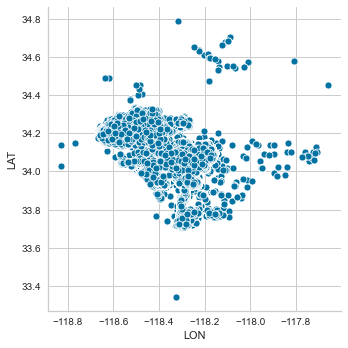

In [6]:
sns.relplot(y='LAT', x='LON', data=location)

* Now we plot a random sample of the data onto a real Los angeles map in order to get an idea of the crime distribution

* We will use StandardScaler() to transform the data so that all features have equal variance.
* This is a necessary step for all clustering analysis

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(location)
scaled_location = pd.DataFrame(X, index=location.index, 
                             columns=location.columns)
scaled_location

,LAT,LON
0,-0.825199,0.843799
1,-1.020012,-0.349844
2,-0.481260,1.004899
3,0.201447,0.278538
4,-0.340753,1.038815
...,...,...
2113788,0.154899,0.094828
2113789,0.076457,-0.133161
2113790,-0.125252,0.678931
2113791,1.278952,-1.407825


* Next up we will use the elbow method to find the best number of clusters for our kmean clustering

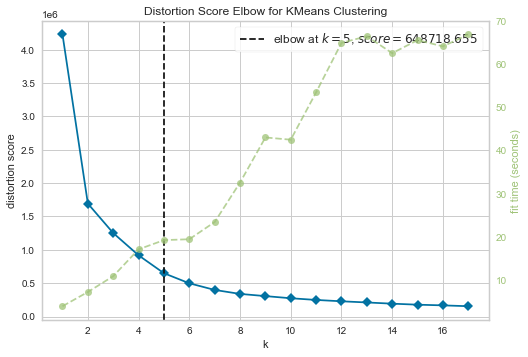

In [102]:
kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1,8))

visualizer.fit(scaled_location)
visualizer.show()

* We see that the optimal number of clusters to use for this analysis is $5$
* That means the best number of groups in order to to create groups with members that are more similar between them than with members of other groups is $5$
We execute the kmeans clustering with 5 centroids:

<Figure size 576x396 with 0 Axes>

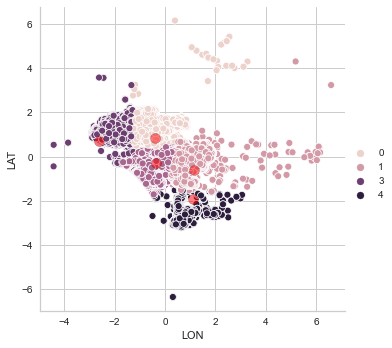

In [9]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(scaled_location)
plt.figure()
sns.relplot(x='LON', y='LAT', hue=kmeans.labels_, data=scaled_location)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', edgecolor='black', s=100, alpha=0.5)

* Now we create a dataframe with the cluster each incident belongs to 
* Then we merge the location dataframe with the kmeans labels in order to depict incidents clustering on the real map

In [10]:
location['label'] = pd.DataFrame(kmeans.labels_)
location

,LAT,LON,label
0,33.9825,-118.2695,1
1,33.9599,-118.3962,2
2,34.0224,-118.2524,1
3,34.1016,-118.3295,2
4,34.0387,-118.2488,1
...,...,...,...
2113788,34.0962,-118.3490,2
2113789,34.0871,-118.3732,2
2113790,34.0637,-118.2870,1
2113791,34.2266,-118.5085,3


Transforming back the centroids in order to show them on the map:

In [11]:
kmeans.cluster_centers_ = scaler.inverse_transform(kmeans.cluster_centers_[:, :] )

Now we can see the results on the LA map:

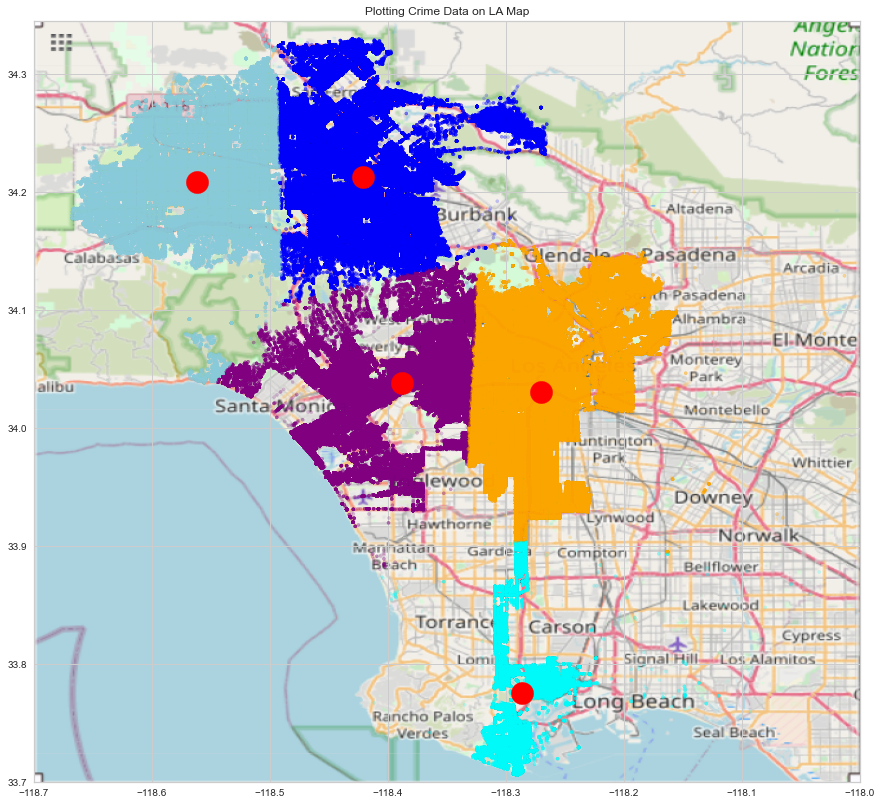

In [13]:
BBox = ((-118.7000, -118, 33.7000, 34.3450)) # coordinates of map
ruh_m = plt.imread('MAP/lamap.png') #importing the map
fig,ax1 = plt.subplots(figsize = (16,14))
colormap = colors.ListedColormap(['blue','orange' ,'purple','c','aqua']) # create new colormap
ax1.scatter(location.LON, location.LAT, zorder=1, alpha= 0.2, cmap=colormap,
           c=location.label, s=10, )
ax1.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], zorder=1, alpha= 1,color='red',
            s=500, ) #plotting the centroids
ax1.set_title('Plotting Crime Data on LA Map')
ax1.set_xlim(BBox[0],BBox[1])
ax1.set_ylim(BBox[2],BBox[3])
ax1.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

#### Conclusions
We can see on the map that each cluster is depicted with a unique color. Also, the red dots refer to the centroid of each cluster. In this way, we create groups (clusters) that contain incidents that
occurred in nearby (similar) areas, while incidents of different clusters occurred in distant (different) areas. In detail, with the kmeans algorithm the cases correspond to the nearest cluster (centroid).

So based on the shape, one could say that the centroids are the locations of police stations in case only 5 stations could exist in Los Angeles. After the centroids were generated by the kmeans algorithm, the average of the square distances between incidents of one cluster and its centroid are minimized. At the same time, we know that historical data repeats itself, so the areas where many crimes were committed in the past, are very likely to have the same fate in the future.

### Clustering on categorical variables
* We will try to cluster by using categorical variables
* We will use kmodes to do that, an adaptation of kmeans where we can use categorical variables
* Kmodes defines clusters based on the number of matching categories between data points.
*To calculate the Hamming distance between data objects 1 and 2, we compare their values for each attribute and count the number of differences..
* We want to identify specific attributes combinations e.g. crime type, weapon used etc.

* Only crime type, weapon used and premises are going to be used
* We are going to try clean the crimes from crime attributes that rarely appear

We pick crime types that have more than $5000$ occurances in the decade

In [14]:
crime_types = la_crimes['CRM_DESC'].value_counts()[:35].index
crime_types = pd.DataFrame(crime_types, columns=['CRM_DESC'])
crime_types

,CRM_DESC
0,BATTERY - SIMPLE ASSAULT
1,BURGLARY FROM VEHICLE
2,VEHICLE - STOLEN
3,THEFT PLAIN - PETTY ($950 & UNDER)
4,BURGLARY
5,THEFT OF IDENTITY
6,INTIMATE PARTNER - SIMPLE ASSAULT
7,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA..."
8,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"
9,VANDALISM - MISDEAMEANOR ($399 OR UNDER)


We also pick weapon used types that have at least around $2500$  occurances in the decade

In [15]:
weapon_types = la_crimes['WEAPON_DESC'].value_counts()[:23].index
weapon_types = pd.DataFrame(weapon_types, columns=['WEAPON_DESC'])
weapon_types

,WEAPON_DESC
0,unknown
1,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"
2,VERBAL THREAT
3,UNKNOWN WEAPON/OTHER WEAPON
4,HAND GUN
5,SEMI-AUTOMATIC PISTOL
6,KNIFE WITH BLADE 6INCHES OR LESS
7,OTHER KNIFE
8,UNKNOWN FIREARM
9,VEHICLE


Lastly, premises types that have at least around  $9000$  occurances in the decade are selected

In [16]:
premises_types = la_crimes['PREMIS_DESC'].value_counts()[:22].index
premises_types = pd.DataFrame(premises_types, columns=['PREMIS_DESC'])
premises_types

,PREMIS_DESC
0,STREET
1,SINGLE FAMILY DWELLING
2,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)"
3,PARKING LOT
4,SIDEWALK
5,OTHER BUSINESS
6,"VEHICLE, PASSENGER/TRUCK"
7,DRIVEWAY
8,GARAGE/CARPORT
9,RESTAURANT/FAST FOOD


* Now we merge all the data into a new dataframe which contains the most occured crime types, weapons used and premises

In [17]:
crimes_kmode = pd.merge (la_crimes, crime_types, on='CRM_DESC' )
crimes_kmode = pd.merge (crimes_kmode, weapon_types, on='WEAPON_DESC' )
crimes_kmode = pd.merge (crimes_kmode, premises_types, on='PREMIS_DESC' )
crimes_kmode

,DR_NO,DATE_OCC,AREA_NAME,DISTR_NO,PART1_2,Crm Cd,CRM_DESC,Mocodes,VICT_AGE,VICT_SEX,VICT_DESC,PREMIS_DESC,WEAPON_DESC,STATUS,CRM_CD2,CRM_CD3,CRM_CD4,LOCATION,LAT,LON
0,1307355,2010-02-20 13:50:00,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,SINGLE FAMILY DWELLING,unknown,Adult Arrest,-1,-1,-1,300 E GAGE AV,33.9825,-118.2695
1,100205595,2010-01-30 20:25:00,Rampart,248,2,900,VIOLATION OF COURT ORDER,unknown,38,F,H,SINGLE FAMILY DWELLING,unknown,Adult Other,-1,-1,-1,400 HARTFORD AV,34.0567,-118.2636
2,100209630,2010-04-11 18:51:00,Rampart,281,2,900,VIOLATION OF COURT ORDER,unknown,25,F,H,SINGLE FAMILY DWELLING,unknown,Invest Cont,-1,-1,-1,1200 S WESTLAKE AV,34.0482,-118.2804
3,100210217,2010-04-21 18:30:00,Rampart,291,2,900,VIOLATION OF COURT ORDER,0906 1816,0,M,H,SINGLE FAMILY DWELLING,unknown,Invest Cont,-1,-1,-1,8TH,34.0501,-118.2686
4,100211380,2010-05-13 10:30:00,Rampart,211,2,900,VIOLATION OF COURT ORDER,1814 2000,29,F,H,SINGLE FAMILY DWELLING,unknown,Adult Other,-1,-1,-1,600 HELIOTROPE DR,34.0812,-118.2953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769019,111319959,2011-08-26 16:00:00,Newton,1303,1,210,ROBBERY,0202 0302 0337 0344 0601,42,M,H,PARKING UNDERGROUND/BUILDING,REVOLVER,Invest Cont,-1,-1,-1,1100 WALL ST,34.0365,-118.2541
1769020,121515714,2012-07-31 11:00:00,N Hollywood,1548,1,210,ROBBERY,0355 0330 0202 0400 0301 0334 0341 0916 1316 0344,33,M,W,PARKING UNDERGROUND/BUILDING,REVOLVER,Invest Cont,-1,-1,-1,11100 CHANDLER BL,34.1681,-118.3724
1769021,152016248,2015-09-17 05:05:00,Olympic,2027,1,210,ROBBERY,0202 0209 0302 0334 0354 0355 0432 1206 1309,47,M,B,PARKING UNDERGROUND/BUILDING,REVOLVER,Invest Cont,-1,-1,-1,500 S KENMORE AV,34.0654,-118.2966
1769022,160126071,2016-10-26 13:30:00,Central,111,1,210,ROBBERY,0344 0334 1309 1310 0302,20,M,B,PARKING UNDERGROUND/BUILDING,REVOLVER,Invest Cont,-1,-1,-1,CESAR E CHAVEZ,34.0627,-118.2463


* We execute the kmodes algorithm with 10 different clusters (groups)

In [18]:
km = KModes(n_clusters=10, init='Huang', n_init=3, verbose=1)

clusters = km.fit_predict(crimes_kmode[['CRM_DESC','WEAPON_DESC','PREMIS_DESC']])

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 323269, cost: 1767227.0
Run 1, iteration: 2/100, moves: 9745, cost: 1767227.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 59632, cost: 1971792.0
Run 2, iteration: 2/100, moves: 35462, cost: 1971792.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 182185, cost: 1809627.0
Run 3, iteration: 2/100, moves: 22578, cost: 1809627.0
Best run was number 1
[['VEHICLE - STOLEN' 'unknown' 'STREET']
 ['BURGLARY' 'unknown' 'OTHER BUSINESS']
 ['INTIMATE PARTNER - SIMPLE ASSAULT'
  'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)'
  'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)']
 ['VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)' 'unknown'
  'VEHICLE, PASSENGER/TRUCK']
 ['BURGLARY FROM VEHICLE' 'unknown' 'STREET']
 ['THEFT OF IDENTITY' 'unknown' 'SINGLE 

* We can see in most groups the weapon type is unknown.
* That's why we try to execute the algorithm without the rows with unknown weapon

In [19]:
crimes_kmode = crimes_kmode.loc[crimes_kmode['WEAPON_DESC'] != 'unknown']

In [107]:
km = KModes(n_clusters=10, init='Huang', n_init=3, verbose=1)

clusters = km.fit_predict(crimes_kmode[['CRM_DESC','WEAPON_DESC','PREMIS_DESC']])

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 128277, cost: 548348.0
Run 1, iteration: 2/100, moves: 55227, cost: 543041.0
Run 1, iteration: 3/100, moves: 459, cost: 543041.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 169194, cost: 498624.0
Run 2, iteration: 2/100, moves: 22260, cost: 498624.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 130224, cost: 543223.0
Run 3, iteration: 2/100, moves: 802, cost: 543223.0
Best run was number 2
[['ROBBERY' 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)' 'SIDEWALK']
 ['BATTERY - SIMPLE ASSAULT'
  'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)'
  'SINGLE FAMILY DWELLING']
 ['ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT' 'HAND GUN' 'STREET']
 ['INTIMATE PARTNER - SIMPLE ASSAULT'
  'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)'
  'SINGLE FAMILY DW

Conclusions : 
* Usually burglaries happen with an unknown weapon. On the other side burglaries from vehicles take place at parking lots with unknown weapons
* Generally, trespassing concerns driveways of people
* Many grand thefts of $950.01$ $ and over happen at multi unit dwellings as apartments, duplex etc with different (unknown) weapons
* Usually vehicles thefts happen at the street
* Typically battery - simple assault takes place at the street, the sidewalk and single family dwellings with the use of hands, fist, feet or bodily force as a weapon
* Generally, vandalism both as a misdeameanor and felony happens at vehicles or trucks
* Most intimate partner simple assaults occur at a multi-unit dwelling as apartment or duplex or single family dwellings with the use of hands,fist, feet or bodily force as a weapon
* Typically, robberies take place at the sidewalk or street with the use of hands,fist, feet or bodily force as a weapon
* Also, generally hand guns are used for assaults with deadly weapon ( aggravated assaults) which take place at the street
* Lastly, criminal threats with no weapon happen at single family dwellings with the use of verbal threats.

Note: It is very important to understand how the kmode algorithm works. The algorithm tries to create modes(groups) that will fit as many as possible, similar incidents in each particular group. That means if an incident has two of the three columns we investigate equal to a centroid, it will probably belong to that particular centroid (group). As a result the centroids may not always describe groups with the most amount of occurances but it surely associates different types of crimes with different types of weapons and different types of premises which commonly occur.

## Clustering & examining different districts criminality
We start by clearing crime types that are very rare

In [22]:
crime_types = la_crimes['CRM_DESC'].value_counts()[:100].index
crime_types = pd.DataFrame(crime_types, columns=['CRM_DESC'])
crime_types

,CRM_DESC
0,BATTERY - SIMPLE ASSAULT
1,BURGLARY FROM VEHICLE
2,VEHICLE - STOLEN
3,THEFT PLAIN - PETTY ($950 & UNDER)
4,BURGLARY
...,...
95,RECKLESS DRIVING
96,SHOPLIFTING - ATTEMPT
97,"DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $400"
98,LEWD/LASCIVIOUS ACTS WITH CHILD


Only the more common crime types are kept:

In [23]:
la_crimes_clearedcrimes = pd.merge(la_crimes, crime_types, on='CRM_DESC')
la_crimes_clearedcrimes

,DR_NO,DATE_OCC,AREA_NAME,DISTR_NO,PART1_2,Crm Cd,CRM_DESC,Mocodes,VICT_AGE,VICT_SEX,VICT_DESC,PREMIS_DESC,WEAPON_DESC,STATUS,CRM_CD2,CRM_CD3,CRM_CD4,LOCATION,LAT,LON
0,1307355,2010-02-20 13:50:00,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,SINGLE FAMILY DWELLING,unknown,Adult Arrest,-1,-1,-1,300 E GAGE AV,33.9825,-118.2695
1,90631215,2010-01-05 01:50:00,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,F,W,STREET,HAND GUN,Invest Cont,998,-1,-1,CAHUENGA BL,34.1016,-118.3295
2,100104288,2010-01-06 10:00:00,Central,123,2,900,VIOLATION OF COURT ORDER,1501,31,F,B,"GOVERNMENT FACILITY (FEDERAL,STATE, COUNTY & C...",VERBAL THREAT,Invest Cont,-1,-1,-1,200 W TEMPLE ST,34.0549,-118.2426
3,100105672,2010-02-01 18:40:00,Central,185,2,900,VIOLATION OF COURT ORDER,1501,34,M,W,OFFICE BUILDING/OFFICE,unknown,Adult Other,-1,-1,-1,100 E 9TH ST,34.0416,-118.2550
4,100105709,2010-02-02 16:00:00,Central,157,2,900,VIOLATION OF COURT ORDER,0601,0,M,B,OTHER RESIDENCE,unknown,Invest Cont,-1,-1,-1,500 S SAN PEDRO ST,34.0442,-118.2439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112604,190122258,2019-03-06 00:01:00,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,POLICE FACILITY,unknown,Invest Cont,-1,-1,-1,200 E 6TH ST,34.0448,-118.2474
2112605,191225880,2019-09-06 00:01:00,77th Street,1258,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,POLICE FACILITY,unknown,Adult Arrest,-1,-1,-1,7600 S BROADWAY,33.9708,-118.2783
2112606,191006581,2019-01-28 07:00:00,West Valley,1008,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,F,X,"GOVERNMENT FACILITY (FEDERAL,STATE, COUNTY & C...",unknown,Invest Cont,-1,-1,-1,8100 BALBOA PL,34.2179,-118.5014
2112607,190704447,2019-01-10 11:00:00,Wilshire,711,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501 2004,0,M,W,POLICE FACILITY,unknown,Adult Arrest,-1,-1,-1,LAUREL,34.0761,-118.3648


We create a pivot table with all the sum of all the different crimes for each district

In [24]:
distr_crimes = la_crimes_clearedcrimes.pivot_table(index="DISTR_NO", columns="CRM_DESC", values='DR_NO',aggfunc='count')
distr_crimes = distr_crimes.reset_index()
distr_crimes = distr_crimes.fillna(0)

* At this point we drop the rows that are not connected with the criminality of the particular district but stem from other factors. For example, the letters, phone calls received as LEWD (underaged) and the intimate partner crimes are not connected directly to the place  

In [25]:
distr_crimes = distr_crimes.drop(['INTIMATE PARTNER - SIMPLE ASSAULT', 'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
    'INTIMATE PARTNER - AGGRAVATED ASSAULT','CHILD NEGLECT (SEE 300 W.I.C.)',
    'THREATENING PHONE CALLS/LETTERS'],   axis=1)
distr_crimes

CRM_DESC,DISTR_NO,ARSON,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",ATTEMPTED ROBBERY,BATTERY - SIMPLE ASSAULT,BATTERY ON A FIREFIGHTER,BATTERY POLICE (SIMPLE),BATTERY WITH SEXUAL CONTACT,BIKE - STOLEN,...,THROWING OBJECT AT MOVING VEHICLE,TRESPASSING,UNAUTHORIZED COMPUTER ACCESS,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",VANDALISM - MISDEAMEANOR ($399 OR UNDER),VEHICLE - ATTEMPT STOLEN,VEHICLE - STOLEN,VIOLATION OF COURT ORDER,VIOLATION OF RESTRAINING ORDER,VIOLATION OF TEMPORARY RESTRAINING ORDER
0,100,0.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,101,2.0,0.0,56.0,6.0,112.0,1.0,2.0,9.0,16.0,...,1.0,23.0,2.0,85.0,105.0,6.0,180.0,8.0,8.0,1.0
2,105,3.0,1.0,16.0,4.0,31.0,0.0,1.0,0.0,3.0,...,0.0,2.0,0.0,45.0,28.0,2.0,82.0,3.0,1.0,0.0
3,109,2.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,6.0,0.0,0.0,4.0,0.0,0.0,0.0
4,111,21.0,8.0,256.0,56.0,674.0,0.0,21.0,73.0,67.0,...,8.0,65.0,3.0,303.0,284.0,8.0,360.0,31.0,29.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2189,14.0,0.0,60.0,12.0,253.0,2.0,5.0,17.0,3.0,...,5.0,46.0,6.0,201.0,90.0,4.0,181.0,13.0,22.0,0.0
1299,2196,0.0,0.0,13.0,1.0,57.0,0.0,1.0,3.0,0.0,...,1.0,24.0,3.0,41.0,33.0,1.0,32.0,13.0,19.0,2.0
1300,2197,0.0,0.0,8.0,0.0,18.0,0.0,0.0,0.0,0.0,...,0.0,15.0,1.0,29.0,13.0,1.0,11.0,3.0,3.0,0.0
1301,2198,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,7.0,4.0,0.0,4.0,0.0,1.0,0.0


We create a new dataframe with the district codes and we drop the column because it is not useful for clustering

In [26]:
distr_codes= pd.DataFrame()
distr_codes['DISTR_NO'] = distr_crimes['DISTR_NO'].copy()
distr_crimes = distr_crimes.drop(['DISTR_NO'], axis=1)
distr_codes

,DISTR_NO
0,100
1,101
2,105
3,109
4,111
...,...
1298,2189
1299,2196
1300,2197
1301,2198


* Now we will use cluster analysis to find groups with districts that are most similar to each other and most different to districts of other clusters when it comes to the types of crimes committed  
* We will use StandardScaler() to transform the data so that all columns have equal variance. Necessary step in clustering. In detail, the mean of the distribution is 0 and the variance is equal to 1

In [27]:
scaler = StandardScaler()
X = scaler.fit_transform(distr_crimes)
scaled_distr_crimes = pd.DataFrame(X, index=distr_crimes.index, 
                             columns=distr_crimes.columns)
scaled_distr_crimes

CRM_DESC,ARSON,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",ATTEMPTED ROBBERY,BATTERY - SIMPLE ASSAULT,BATTERY ON A FIREFIGHTER,BATTERY POLICE (SIMPLE),BATTERY WITH SEXUAL CONTACT,BIKE - STOLEN,BOAT - STOLEN,...,THROWING OBJECT AT MOVING VEHICLE,TRESPASSING,UNAUTHORIZED COMPUTER ACCESS,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",VANDALISM - MISDEAMEANOR ($399 OR UNDER),VEHICLE - ATTEMPT STOLEN,VEHICLE - STOLEN,VIOLATION OF COURT ORDER,VIOLATION OF RESTRAINING ORDER,VIOLATION OF TEMPORARY RESTRAINING ORDER
0,-0.788017,-0.545349,-0.799151,-0.761967,-0.893136,-0.379811,-0.465930,-0.877134,-0.359013,-0.295999,...,-0.745572,-0.772783,-0.646482,-1.212413,-1.102325,-0.882572,-1.075661,-0.820162,-0.996672,-0.581822
1,-0.206598,-0.545349,-0.172559,-0.265131,-0.216489,1.142938,-0.216502,0.035973,0.162969,-0.295999,...,-0.156081,0.300013,0.505078,0.014568,0.573766,1.177114,0.502534,-0.393504,-0.459034,-0.056084
2,0.084112,-0.102061,-0.628262,-0.430743,-0.728717,-0.379811,-0.341216,-0.877134,-0.261142,-0.295999,...,-0.745572,-0.679496,-0.646482,-0.562835,-0.667186,-0.196010,-0.356705,-0.660166,-0.929467,-0.581822
3,-0.206598,-0.545349,-0.799151,-0.679161,-0.912108,-0.379811,-0.465930,-0.674221,-0.326389,-0.295999,...,-0.745572,-0.772783,-0.646482,-1.125802,-1.118441,-0.882572,-1.040590,-0.820162,-0.996672,-0.581822
4,5.316883,3.000948,2.105957,3.875163,3.337486,-0.379811,2.153060,6.529177,1.826789,-0.295999,...,3.970351,2.259032,1.080858,3.161413,3.458577,1.863677,2.080729,0.833137,0.952264,-0.581822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,3.281917,-0.545349,-0.126988,0.231704,0.675166,2.665688,0.157639,0.847623,-0.261142,-0.295999,...,2.201880,1.372810,2.808197,1.689036,0.332022,0.490552,0.511302,-0.126843,0.481831,-0.581822
1299,-0.788017,-0.545349,-0.662440,-0.679161,-0.564298,-0.379811,-0.341216,-0.572765,-0.359013,-0.295999,...,-0.156081,0.346657,1.080858,-0.620575,-0.586605,-0.539291,-0.795093,-0.126843,0.280217,0.469654
1300,-0.788017,-0.545349,-0.719402,-0.761967,-0.810927,-0.379811,-0.465930,-0.877134,-0.359013,-0.295999,...,-0.745572,-0.073133,-0.070702,-0.793796,-0.908930,-0.539291,-0.979216,-0.660166,-0.795058,-0.581822
1301,-0.788017,-0.545349,-0.810543,-0.761967,-0.905784,-0.379811,-0.465930,-0.775677,-0.359013,-0.295999,...,-0.745572,-0.726139,-0.646482,-1.111367,-1.053976,-0.882572,-1.040590,-0.820162,-0.929467,-0.581822


Elbow method is used to find the best amount of clusters

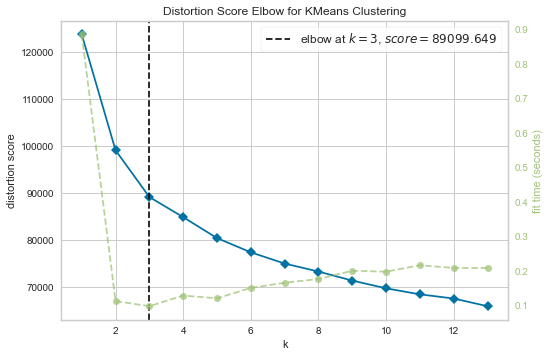

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1,14))

visualizer.fit(scaled_distr_crimes)
visualizer.show()

* Now we can use kmeans clustering

In [29]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=100).fit(scaled_distr_crimes)
print(kmeans.cluster_centers_)

[[-0.52986689 -0.36590593 -0.59160509 -0.55581315 -0.63506434 -0.25799087
  -0.31647298 -0.58266697 -0.22241044 -0.11937339 -0.14750069 -0.65041124
  -0.382155   -0.58285211 -0.52177121 -0.6118469  -0.58161117 -0.52409285
  -0.5010974  -0.41062155 -0.58870352 -0.53639917 -0.42469259 -0.32281786
  -0.3272882  -0.2275515  -0.21170436 -0.46093491 -0.70898282 -0.58241081
  -0.50407029 -0.25272328 -0.17417272 -0.50364027 -0.45950827 -0.57435081
  -0.2399982  -0.28869345 -0.04242943 -0.21488768 -0.534505   -0.33812203
  -0.37685252 -0.19260197 -0.11479721 -0.27863263 -0.53319572 -0.49050366
  -0.36508786 -0.38818907 -0.21746905 -0.47916986 -0.47072252 -0.47128874
  -0.12899276 -0.3558874  -0.18065484 -0.17954652 -0.16975971 -0.40382983
  -0.47035625 -0.58304711 -0.24859413 -0.39130227 -0.54945695 -0.08559798
  -0.5427663  -0.39173199 -0.18909971 -0.18463201 -0.11129715 -0.39166268
  -0.22513416 -0.45894522 -0.47864784 -0.36679809 -0.56987995 -0.76239044
  -0.27461632 -0.6638175  -0.43534263 

By checking the centroids centers, we can understand the type of district it describes. 
* In details, the first centroid has values below 0 for all the columns which means this centroid describes the safer district, meaning the ones with the lesser crime types reported
* The second centroid has values above 1 in most columns which means this centroid describes the more dangerous district, meaning the ones with the most crime types reported
* Lastly, the third centroid has values slightly above (sometimes below) 0 for all the columns which means this centroid describes the medium safe district, meaning the ones with the average crime types reported

We get for each district its label in order to depict it on the map

In [30]:
distr_codes['label'] = pd.DataFrame(kmeans.labels_)
distr_codes

,DISTR_NO,label
0,100,0
1,101,2
2,105,0
3,109,0
4,111,1
...,...,...
1298,2189,2
1299,2196,0
1300,2197,0
1301,2198,0


* It would be more suiting to swap values of labels for lable 1 and 0 (because label 0 is medium safe and 1 is safe district) in order to have a continuous extent.

In [31]:
indexes_2 = distr_codes.loc[distr_codes['label'] == 2].index
indexes_1 = distr_codes.loc[distr_codes['label'] == 1].index
distr_codes.loc[indexes_2,'label'] = 1
distr_codes.loc[indexes_1,'label'] = 2

* New dataframe that includes labels, district and longtitude and latitude for every case

In [32]:
crime_data_district = pd.merge(distr_codes, la_crimes[['DISTR_NO','LAT','LON']], on='DISTR_NO')
crime_data_district

,DISTR_NO,label,LAT,LON
0,100,0,34.0428,-118.2461
1,100,0,34.0428,-118.2461
2,100,0,34.0423,-118.2452
3,100,0,34.0460,-118.2509
4,100,0,34.0407,-118.2680
...,...,...,...,...
2114694,2198,0,34.1483,-118.6034
2114695,2198,0,34.1467,-118.6054
2114696,2198,0,34.1490,-118.6052
2114697,2198,0,34.1446,-118.5985


* We will use a map in order to showcase the results 

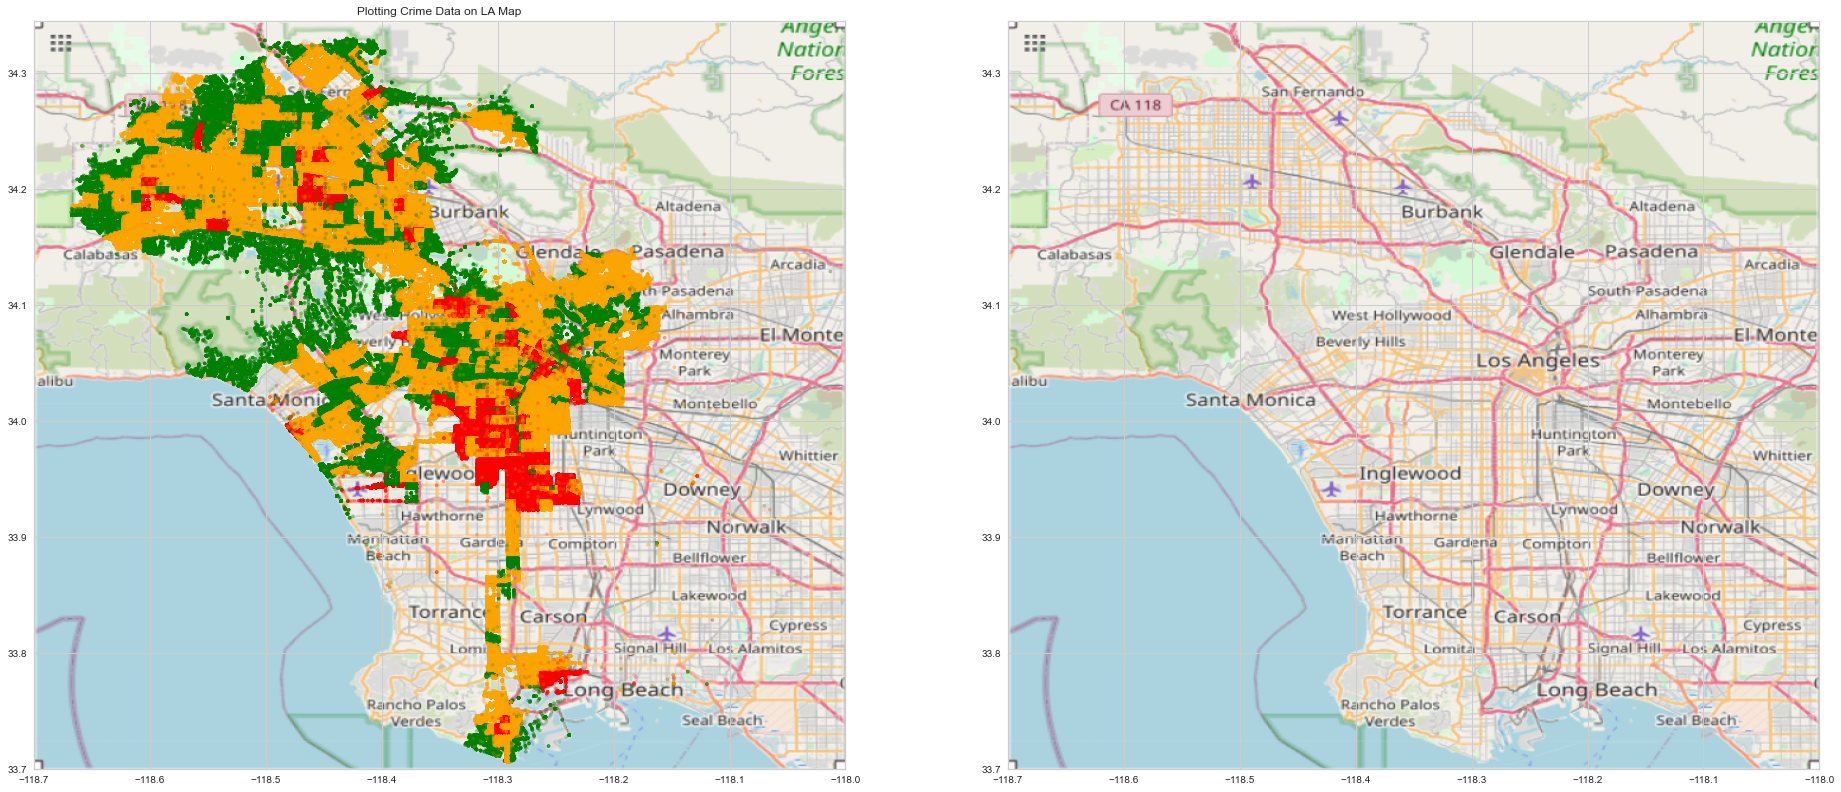

In [34]:
BBox = ((-118.7000, -118, 33.7000, 34.3450)) # coordinates of map
ruh_m = plt.imread('MAP/lamap.png') #importing the map
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (32,28))
colormap = colors.ListedColormap(['green','orange' ,'red']) # create new colormap
ax1.scatter(crime_data_district.LON, crime_data_district.LAT, zorder=1, alpha= 0.2, cmap=colormap,
           c=crime_data_district.label, s=10, )
ax1.set_title('Plotting Crime Data on LA Map')
ax1.set_xlim(BBox[0],BBox[1])
ax1.set_ylim(BBox[2],BBox[3])
ax1.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')
ax2.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

## Conclusions
In the map we can see three different colors of points. Every point is a reported crime incident from 2010 till 2019. Firstly we grouped by each district taking the sum of counts for each different crime type commited in that district. Then we clustered the districts into 3 different clusters. After finding out that each different cluster defines the safety of the district because of the values of the centroids ( one centroid has negative values after normalization, one centroid has values around 0 and the other values around 1), we can make conclusions on the safety of the regions
* The green points of the map concern districts with lesser crimes that normally. Those are the safer zones. That is because those districts belong to the clusters with the negative values of the centroid. Some examples are: Bel Air, Beverly Hills, West Hollywood, Brentwood,  Mulholland Dr /Sepulveda Blvd and Palisades Dr / Ave De Santa Ynez
* The orange points of the map concern districts with average amount of crimes. Those are neither the safest nor the most dangerous zones. That is explained from the fact that those districts belong to the clusters with the  values of the centroid that are approximately 0. Some examples are:  Harbor Blvd, Forest Lawn Dr, Dolanco Junction and Tampa Ave
* The red points of the maps concern districts with more crimes that normally, those are considered the dangerous zones. That is because those districts belong to the clusters with the high (positive) values of the centroid. Examples are Downtown, South Park, Central city and Fashion District

Note: the regions that have no color are either very safe (no crimes committed) or there are no data crimes reported or the crimes incidents are missing. For example for the Marvin Braude Mulholland Gateway Park ( located on the north west LA, green forest) we can hypothesize that no crimes where commited there because people are not living there. However, for the area of Torrance we can hypothesize that the crimes for that region are missing because there are no incidents